In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from LinearRegression import*
import datetime

# Reading data from excel-sheet

In [2]:
df = pd.read_csv( r'AirQualityUCI.csv')

# Analysing the data

In [3]:
df.columns.values

array(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'], dtype=object)

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [5]:
df.shape

(9357, 15)

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


# Data Cleaning

In [8]:
df.duplicated().sum()

0

In [9]:
df.replace(-200, np.nan, inplace=True)

In [10]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [11]:
df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

**Since 8443 values of NMHC(GT) are empty so we drop this feature

In [12]:
df=df.drop('NMHC(GT)',axis=1,inplace=False)

# Creating the month and time column as interger values

In [13]:
X=[]
for i in df['Time']:
    i = str(i)
    Hour = (datetime.datetime.strptime(i,'%H:%M:%S')).hour
    X.append(Hour)
X = np.array(X)    
df['Hour']=X.T  
df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date',inplace=True)
df['Month']=df.index.month
df.reset_index(inplace=True)
df

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-03-10,18:00:00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,18,3
1,2004-03-10,19:00:00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,19,3
2,2004-03-10,20:00:00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,20,3
3,2004-03-10,21:00:00,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,21,3
4,2004-03-10,22:00:00,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,4
9353,2005-04-04,11:00:00,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,4
9354,2005-04-04,12:00:00,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,4
9355,2005-04-04,13:00:00,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         7674 non-null   float64       
 3   PT08.S1(CO)    8991 non-null   float64       
 4   C6H6(GT)       8991 non-null   float64       
 5   PT08.S2(NMHC)  8991 non-null   float64       
 6   NOx(GT)        7718 non-null   float64       
 7   PT08.S3(NOx)   8991 non-null   float64       
 8   NO2(GT)        7715 non-null   float64       
 9   PT08.S4(NO2)   8991 non-null   float64       
 10  PT08.S5(O3)    8991 non-null   float64       
 11  T              8991 non-null   float64       
 12  RH             8991 non-null   float64       
 13  AH             8991 non-null   float64       
 14  Hour           9357 non-null   int32         
 15  Month          9357 n

In [15]:
df.AH.unique()

array([0.7578, 0.7255, 0.7502, ..., 0.7119, 0.5139, 0.5028])

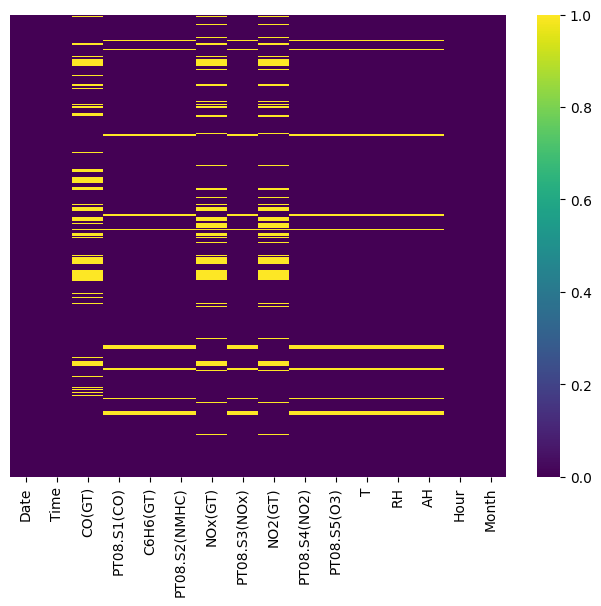

In [16]:
plt.figure(figsize=(8,6))
sb.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap = 'viridis')
plt.show()

# Filled remaining empty cells with mean value of particular column

In [17]:
df['CO(GT)'].fillna(df['CO(GT)'].mean(),inplace=True)
df['PT08.S1(CO)'].fillna(df['PT08.S1(CO)'].mean(),inplace=True)
df['C6H6(GT)'].fillna(df['C6H6(GT)'].mean(),inplace=True)
df['PT08.S2(NMHC)'].fillna(df['PT08.S2(NMHC)'].mean(),inplace=True)
df['NOx(GT)'].fillna(df['NOx(GT)'].mean(),inplace=True)
df['PT08.S3(NOx)'].fillna(df['PT08.S3(NOx)'].mean(),inplace=True)
df['NO2(GT)'].fillna(df['NO2(GT)'].mean(),inplace=True)
df['PT08.S4(NO2)'].fillna(df['PT08.S4(NO2)'].mean(),inplace=True)
df['PT08.S5(O3)'].fillna(df['PT08.S5(O3)'].mean(),inplace=True)
df['T'].fillna(df['T'].mean(),inplace=True)
df['RH'].fillna(df['RH'].mean(),inplace=True)
df['AH'].fillna(df['AH'].mean(),inplace=True)

# Correlational Analysis

In [18]:
df.corr().round(3)

C:\Users\bagri\AppData\Local\Temp\ipykernel_21456\352886112.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(3)


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
CO(GT),1.000,0.773,0.812,0.796,0.762,-0.614,0.646,0.558,0.759,0.020,0.043,0.043,0.324,0.103
PT08.S1(CO),0.773,1.000,0.884,0.893,0.616,-0.772,0.563,0.683,0.899,0.049,0.115,0.135,0.321,-0.039
C6H6(GT),0.812,0.884,1.000,0.982,0.617,-0.736,0.536,0.766,0.866,0.199,-0.062,0.168,0.337,0.125
PT08.S2(NMHC),0.796,0.893,0.982,1.000,0.602,-0.797,0.561,0.777,0.881,0.241,-0.090,0.187,0.381,0.125
NOx(GT),0.762,0.616,0.617,0.602,1.000,-0.563,0.763,0.205,0.688,-0.236,0.193,-0.127,0.200,0.130
PT08.S3(NOx),-0.614,-0.772,-0.736,-0.797,-0.563,1.000,-0.569,-0.538,-0.797,-0.145,-0.057,-0.232,-0.317,-0.060
NO2(GT),0.646,0.563,0.536,0.561,0.763,-0.569,1.000,0.141,0.629,-0.165,-0.081,-0.291,0.328,-0.161
PT08.S4(NO2),0.558,0.683,0.766,0.777,0.205,-0.538,0.141,1.000,0.591,0.561,-0.032,0.630,0.217,0.171
PT08.S5(O3),0.759,0.899,0.866,0.881,0.688,-0.797,0.629,0.591,1.000,-0.027,0.125,0.071,0.240,0.048
T,0.020,0.049,0.199,0.241,-0.236,-0.145,-0.165,0.561,-0.027,1.000,-0.579,0.656,0.202,0.275


C:\Users\bagri\AppData\Local\Temp\ipykernel_21456\2205191508.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr().round(3),annot=False,vmin=-1,vmax=1,cmap='vlag')  #heatmap of correlation matrix


<AxesSubplot: >

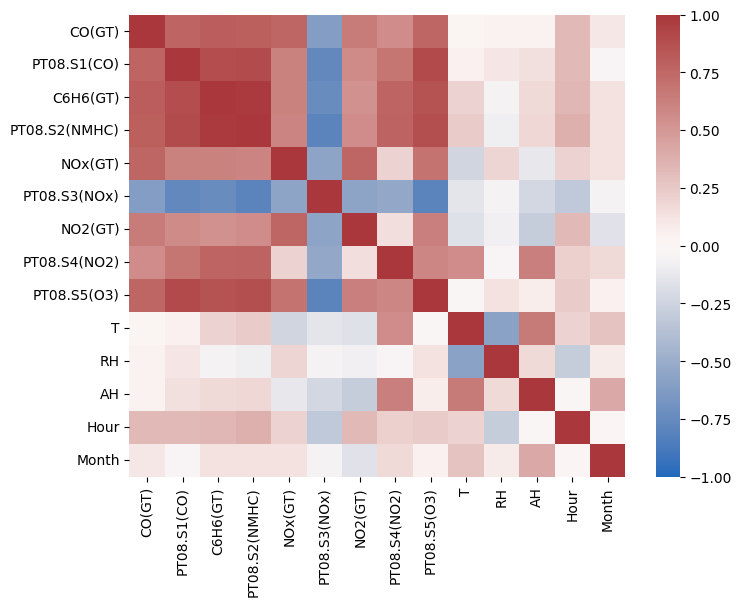

In [19]:
ax= plt.subplots(figsize=(8,6))
sb.heatmap(df.corr().round(3),annot=False,vmin=-1,vmax=1,cmap='vlag')  #heatmap of correlation matrix

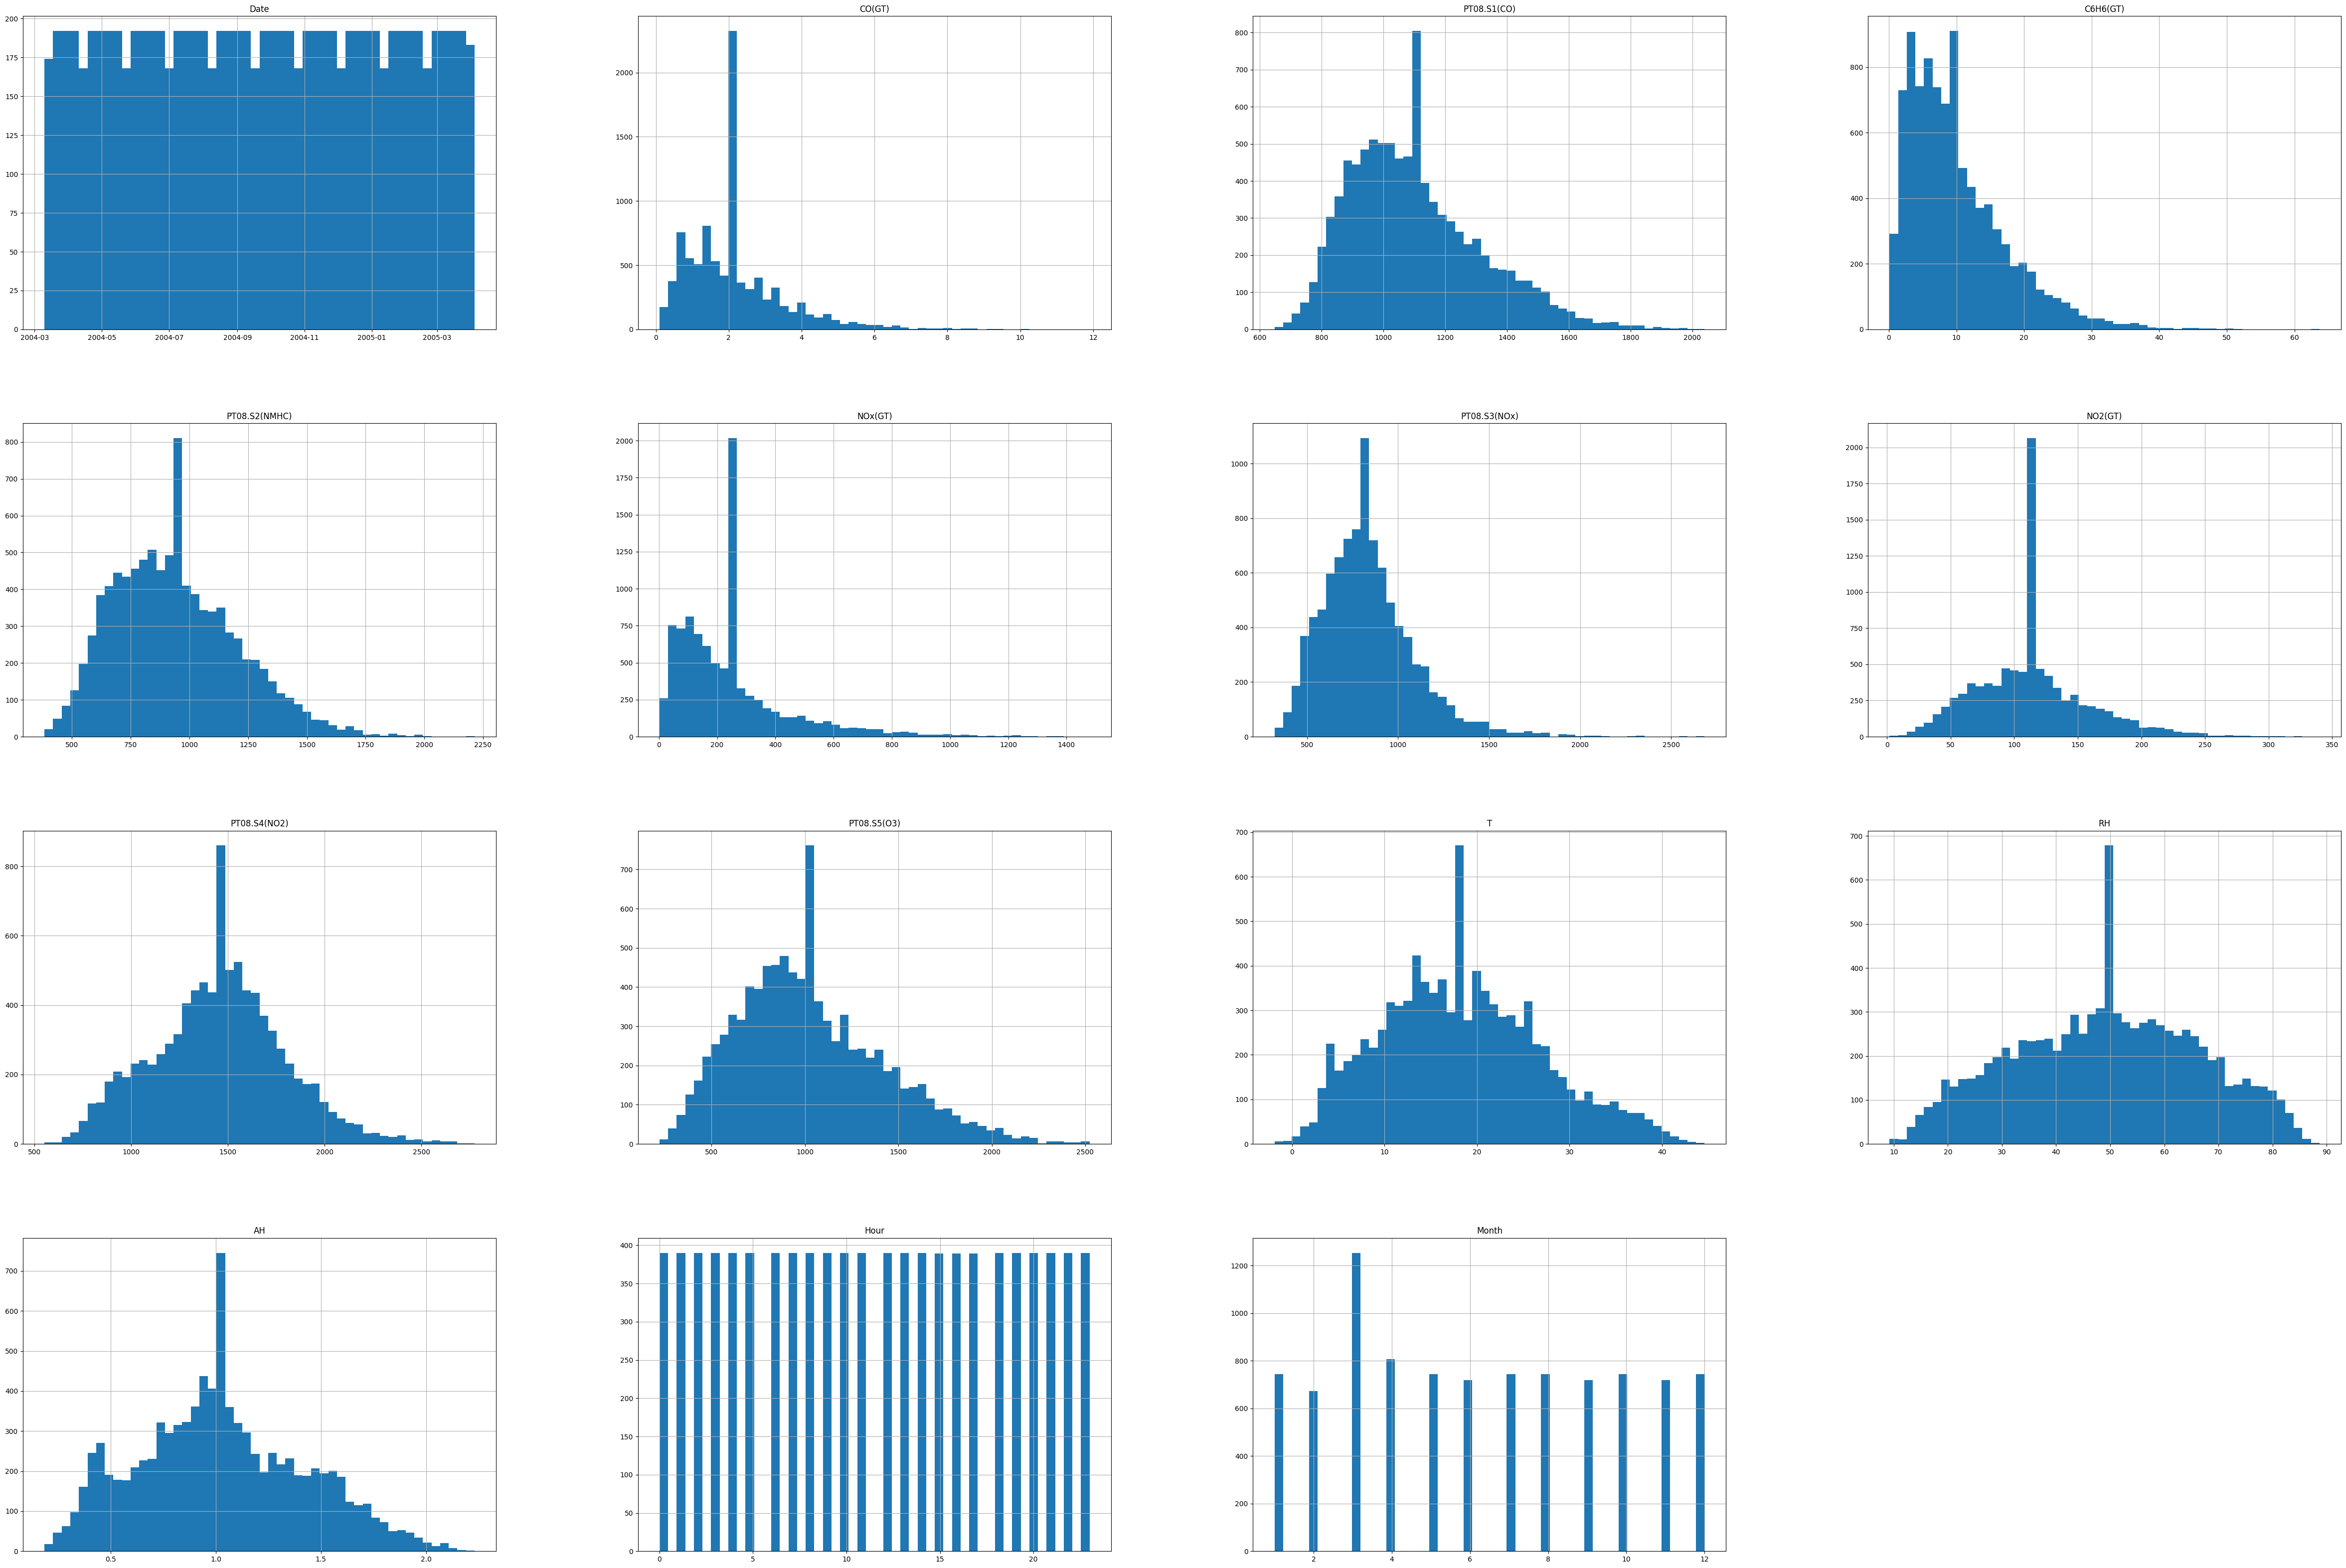

In [20]:
df.hist(bins=50, figsize=(60,40));       

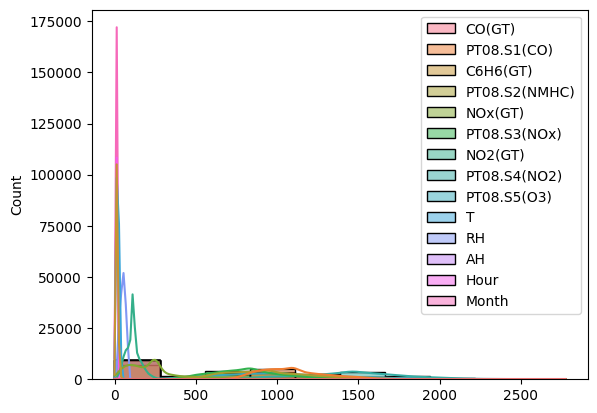

In [21]:
myplot=sb.histplot(df,kde=True,bins=10)

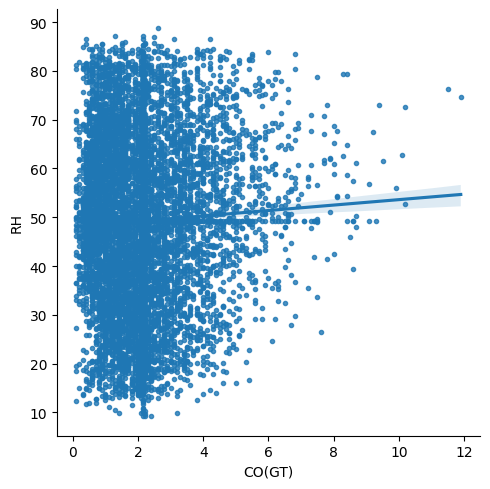

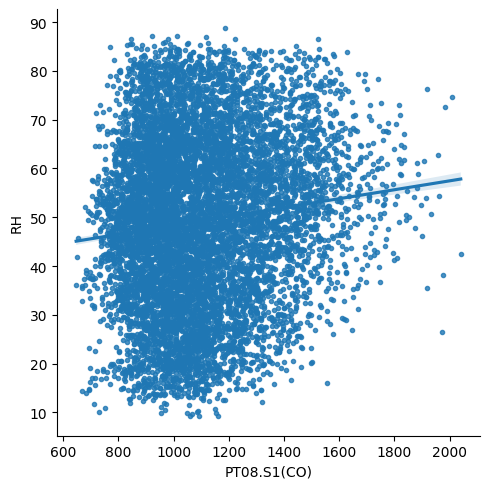

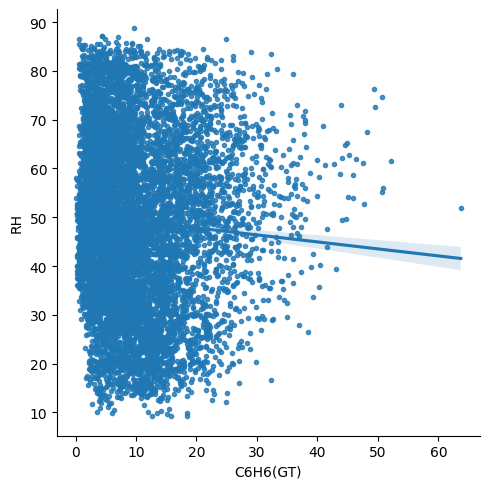

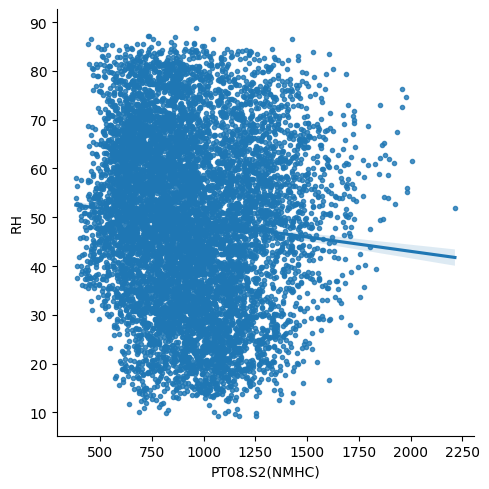

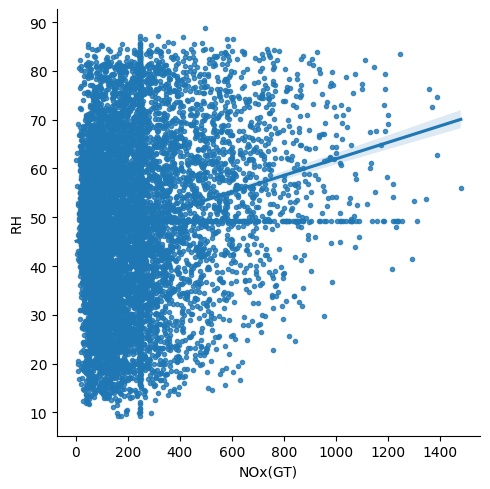

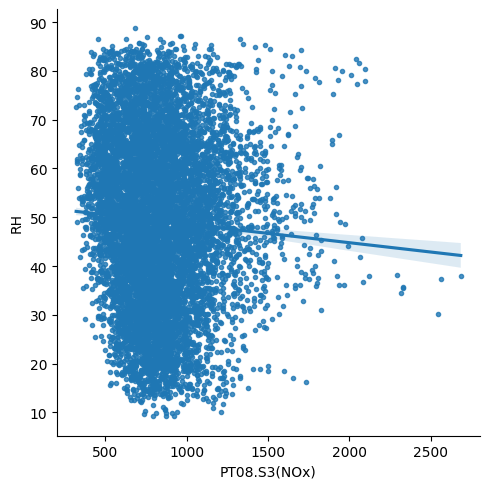

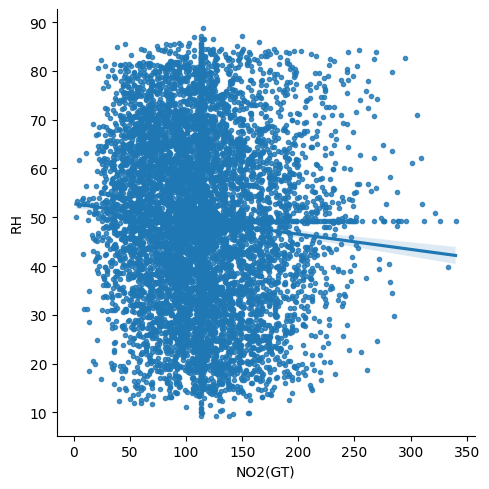

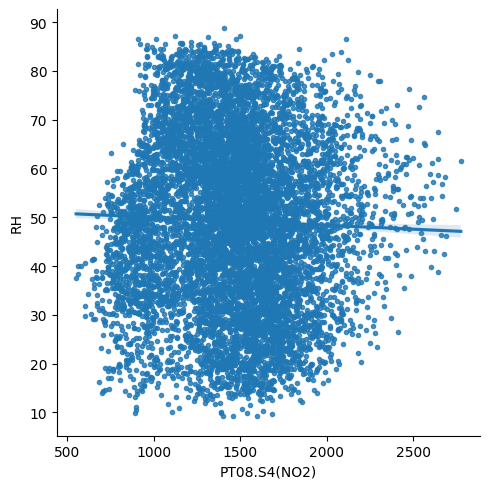

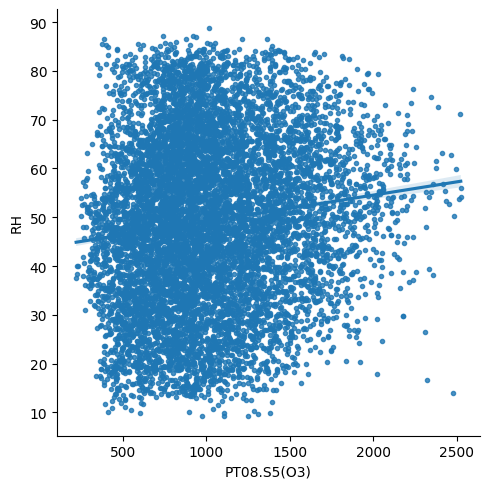

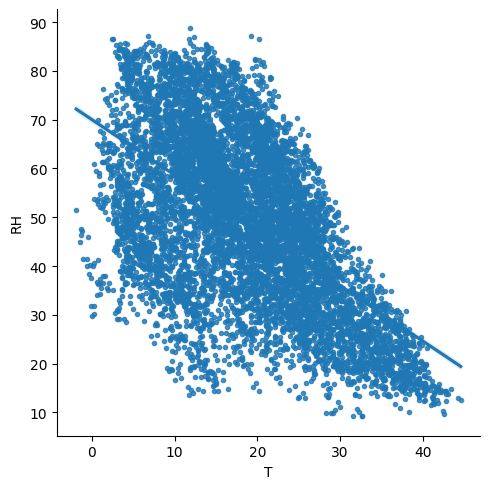

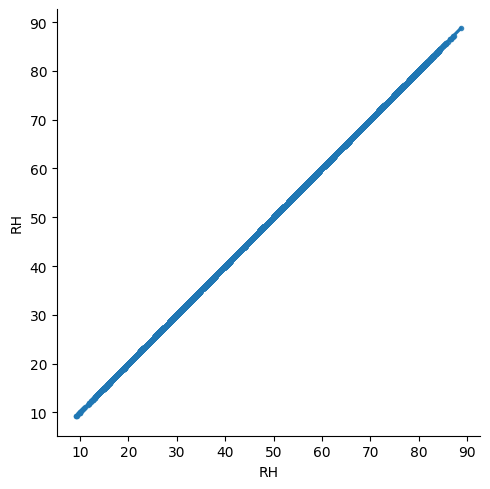

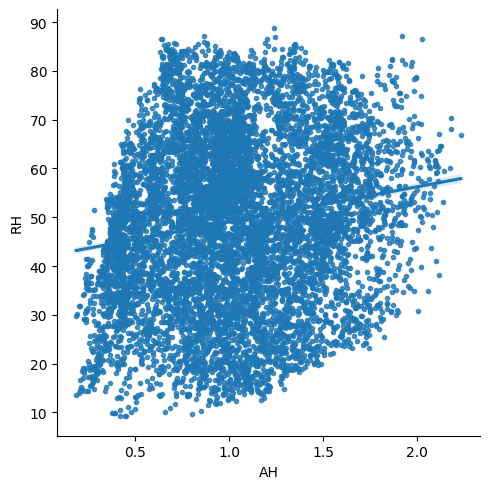

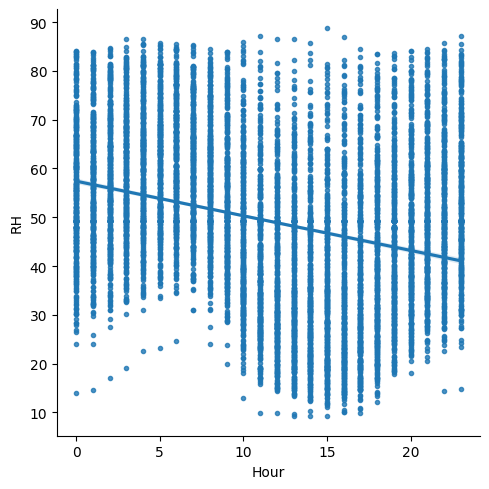

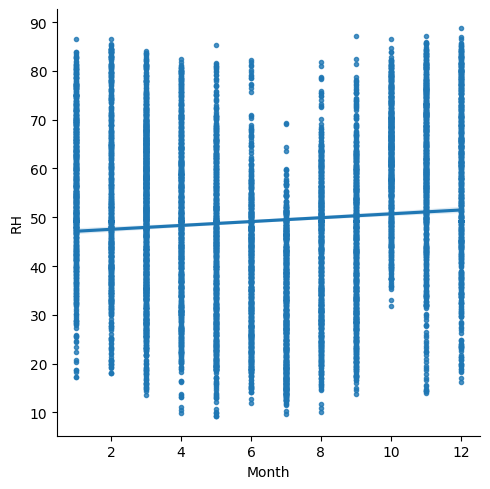

In [22]:
col_=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sb.lmplot(x=i,y='RH',data=df,markers='.')

# Converting dataframe into numpy arrays and Normalization using sklearn

In [23]:
arr = df.to_numpy()

In [24]:
X = arr[:,2:14]
Y = arr[:,14]
z=arr[:,15].T 
for i in X:
    j=0;
    i=np.append(i,z[j])
    j+=1;


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1,train_size=0.9, random_state=42)

In [26]:
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# Prediction and Error using Gradient descent method

# L1 -Regularization

In [27]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 1;
theta = np.zeros(13);

In [28]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45855194  0.40715572  0.32140109  0.56398626  0.01597089 -0.46632875
  0.68569245  0.02279752 -0.12456402  0.5529239  -1.08010214 -0.28416474
  7.29570975]


In [29]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.50496617972417


In [30]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)    
print('predicted values of relative humidity using gradient descent method(L1-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L1-Regu):
 [ 6.94647787  5.28735752 10.18907496 10.33570734  7.78619148  3.98428516
  5.66829871  8.94327225  3.7478169   6.15174167  4.54387034  3.07740722
  2.79440635  7.57624274  8.58768946  9.10858899  3.1881736   7.38799089
  8.36821521  5.04732464  6.92058472 12.32540275 10.46374821  3.49566659
 11.61772101  7.08339779  3.88269322  9.63254782  8.7467168   6.76613268
 13.97837981  9.33213375  5.02996432  4.33278085  8.62460792 10.21451814
  4.1123372  10.59780594  8.5084999   6.86946949 11.76882828  2.1536564
  8.59361226 12.50713856  3.85315324  5.30569377  6.83396067 10.75430541
  8.90199555  6.69082025  9.72629051  2.16947655 11.51520486 11.67243362
  8.30918496  6.26773895  4.9404609   6.4111686  13.43259029  4.40493844
  7.21661811  8.66895244 11.39196363  9.8345577   1.9314149   3.30031368
 11.28028981  6.02172663  3.87825618  7.50492193  5.63505015  2.39342801
  7.08325927  4.96013322 11.13021374  9.159399

In [31]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.223756168281593


# L2 Regularization

In [32]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 2;
theta = np.zeros(13);

In [33]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45857912  0.40718649  0.32142734  0.5640156   0.01601656 -0.4661554
  0.6857607   0.0228187  -0.12452804  0.55300819 -1.08001192 -0.28410823
  7.29578504]


In [34]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.504709111379853


In [35]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)  
print('predicted values of relative humidity using gradient descent method(L1-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L1-Regu):
 [ 6.94641618  5.28731165 10.1893127  10.33567755  7.78607775  3.98448326
  5.66816517  8.94329236  3.74788668  6.15179112  4.54398432  3.07735769
  2.79454901  7.5763013   8.58754116  9.10859479  3.18802623  7.38809017
  8.36823289  5.04711959  6.9203483  12.32556128 10.46430461  3.49591164
 11.61789737  7.08342447  3.88238573  9.63271055  8.74691794  6.76610446
 13.97879897  9.33224916  5.03002786  4.33299107  8.62488084 10.2148248
  4.11237244 10.59798038  8.50845536  6.86980525 11.76890336  2.15430001
  8.59375967 12.50759667  3.85301141  5.30582188  6.83404985 10.75438285
  8.90199586  6.69064154  9.72653613  2.16965962 11.51520507 11.67272236
  8.30927888  6.26791058  4.94017845  6.41118003 13.43299897  4.40495753
  7.21669967  8.66897701 11.39222983  9.83476262  1.93159355  3.30012504
 11.28032485  6.02186321  3.87822294  7.5049474   5.6349939   2.39345262
  7.08337576  4.96023786 11.13035053  9.159465

In [36]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.223520027513917


# L3 Regularization

In [37]:
iterations = 100;
alpha = 0.01;
rate_of_regu = 1;
type_of_regu = 3;
theta = np.zeros(13);

In [38]:
a = FitGD(theta,X_train,Y_train,alpha,rate_of_regu,type_of_regu,iterations);
print(a)

[ 0.45855194  0.40715572  0.32140109  0.56398626  0.01597089 -0.46632875
  0.68569245  0.02279752 -0.12456402  0.5529239  -1.08010214 -0.28416474
  7.29570975]


In [39]:
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(a*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))
print('Train set error: ',J_train)

Train set error:  27.50496617972417


In [40]:
x=[]
for f in X_test:
    v=f.copy()
    v=np.append(v,1)
    x.append(v)
x=np.array(x)
Y_pred = []
for i in x:
    a1 = a*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred)  
print('predicted values of relative humidity using gradient descent method(L3-Regu):\n', Y_pred)

predicted values of relative humidity using gradient descent method(L3-Regu):
 [ 6.94647787  5.28735752 10.18907496 10.33570734  7.78619148  3.98428516
  5.66829871  8.94327225  3.7478169   6.15174167  4.54387034  3.07740722
  2.79440635  7.57624274  8.58768946  9.10858899  3.1881736   7.38799089
  8.36821521  5.04732464  6.92058472 12.32540275 10.46374821  3.49566659
 11.61772101  7.08339779  3.88269322  9.63254782  8.7467168   6.76613268
 13.97837981  9.33213375  5.02996432  4.33278085  8.62460792 10.21451814
  4.1123372  10.59780594  8.5084999   6.86946949 11.76882828  2.1536564
  8.59361226 12.50713856  3.85315324  5.30569377  6.83396067 10.75430541
  8.90199555  6.69082025  9.72629051  2.16947655 11.51520486 11.67243362
  8.30918496  6.26773895  4.9404609   6.4111686  13.43259029  4.40493844
  7.21661811  8.66895244 11.39196363  9.8345577   1.9314149   3.30031368
 11.28028981  6.02172663  3.87825618  7.50492193  5.63505015  2.39342801
  7.08325927  4.96013322 11.13021374  9.159399

In [41]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 26.223756168281593


# Predictions and Error analysis using Normal Equations method

In [42]:
th=FitNormal(X_train,Y_train)      
X1=[]
for f in X_train:
    v=f.copy()
    v=np.append(v,1)
    X1.append(v)
X1=np.array(X1)
Y=[]
for j in X1:
    a1=np.sum(th*j)
    Y=np.append(Y,a1)
J_train=np.sum((Y_train-Y)**2)/(2*len(Y))

print('Train set error: ',J_train)

Train set error:  16.142261333703896


In [43]:
Y_pred = []
for i in x:
    a1 = th*i;
    a1 = np.array(a1)
    Y_pred.append(np.sum(a1))
Y_pred = np.array(Y_pred) 
print('predicted values of relative humidity using normal eqns method:\n', Y_pred)

predicted values of relative humidity using normal eqns method:
 [10.49549458  8.29170286 16.27204471 16.09873353 12.97060676 10.1205865
 10.676599   15.3878214   8.62139296 10.20887838 10.48584794  5.78496889
  5.23490858 12.61510603 12.74317366 14.00358802  7.12865429 10.52127654
 14.17097854 10.11734882 12.25956003 15.23992517 12.34440923  5.06307158
 15.06745475 12.02916815  8.2057912  14.55423797 14.58762752  7.88844474
 12.93523705 13.24737274  9.4959433  12.04375009 12.16924425 11.940729
 10.66327046 11.47399682 13.36221634 12.80530048 13.2938728  11.3688601
 12.2187568  17.41924308  5.16680653  8.55497759  8.23578039 11.88669471
 16.36317403 11.95030473 14.6459734   1.95156371 18.73897638 17.11442685
 13.51481007 12.48739285  7.15682194 12.05678647 17.83550362  7.47331848
 12.23338346 18.68542977 13.82174935 17.4065279   2.39243341  6.1533376
 18.93039233  9.31921734  4.17562387 10.59747499  7.86405858  3.50701119
 12.20753521  8.95618313 12.49024189 14.24020068 18.7233467  15.

In [44]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

test set error: 15.382020048892917


# Locally Weighted Regression

In [ ]:
iterations=100
tau=100
Y_pred=LocallyWeighted(X_train,Y_train,x,tau,iterations)
Y_pred=np.array(Y_pred)
print(Y_pred)

In [ ]:
J_test=np.sum((Y_test-Y_pred)**2)/(2*len(Y_test))
print('test set error:',J_test)

# Conclusion: Among all method,Normal eqn method gives the best fit and predict Relative humidity more accurately.